# 1. Import Libraries

In [ ]:
!pip install ydata_profiling
!pip install autoviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f90b7bb0d1620d8b4477f2381184b75c02973d83931879cf490ec7cfa799088e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
from autoviz.AutoViz_Class import AutoViz_Class

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Importing classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# 2. Load Data

In [ ]:
from google.colab import files

# Chạy hàm upload và chọn file từ máy tính của bạn
uploaded = files.upload()

# Hiển thị thông tin về file đã upload
for filename in uploaded.keys():
    print(f'File "{filename}" đã được upload thành công! ({len(uploaded[filename])} bytes)')

Saving glass.csv to glass.csv
File "glass.csv" đã được upload thành công! (10053 bytes)


In [ ]:
df = pd.read_csv('glass.csv')

# 3. Initial Data Analysis

In [ ]:
df.head()

RI      Na     Mg    Al    Si      K    Ca   Ba   Fe   Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0    1 
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0    1 
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0    1 
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0    1 
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0    1

In [ ]:
df.tail()

RI      Na    Mg    Al    Si      K    Ca    Ba   Fe   Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0    7 
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0    7 
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0    7 
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0    7 
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0    7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

RI          Na          Mg          Al          Si           K      \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

           Ca          Ba          Fe         Type     
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

      RI      Na     Mg    Al    Si      K    Ca   Ba   Fe   Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0    1 


# 4. Exploratory Data Analysis

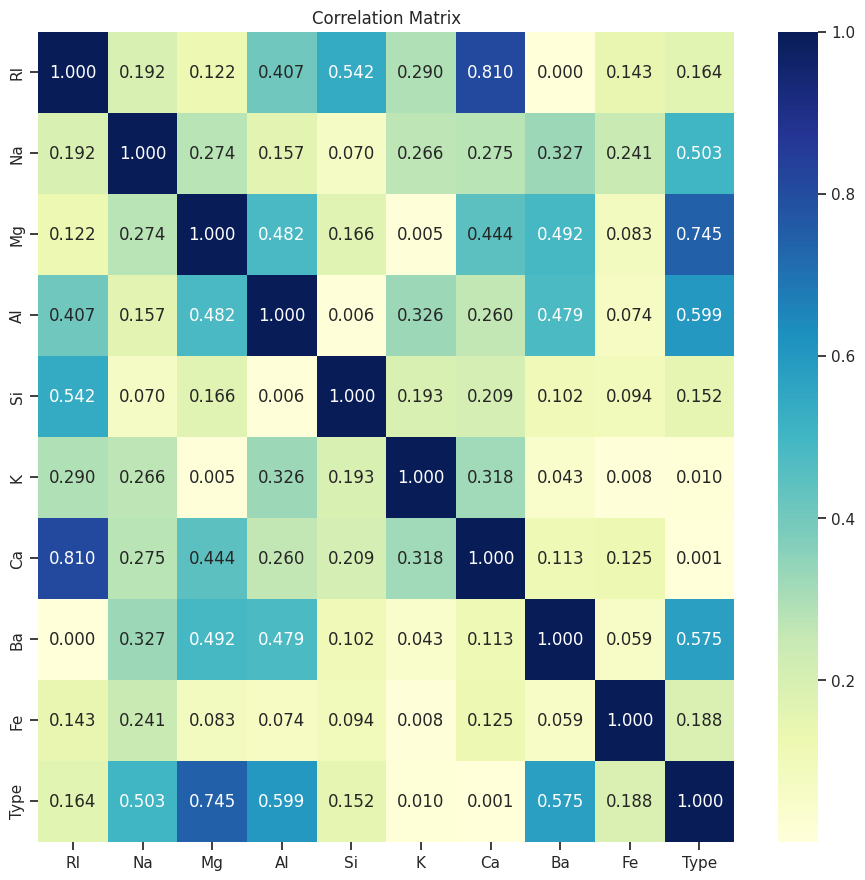

In [ ]:
%matplotlib inline
plt.figure(figsize = (10, 10))
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, fmt = ".3f", annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix")
plt.show()


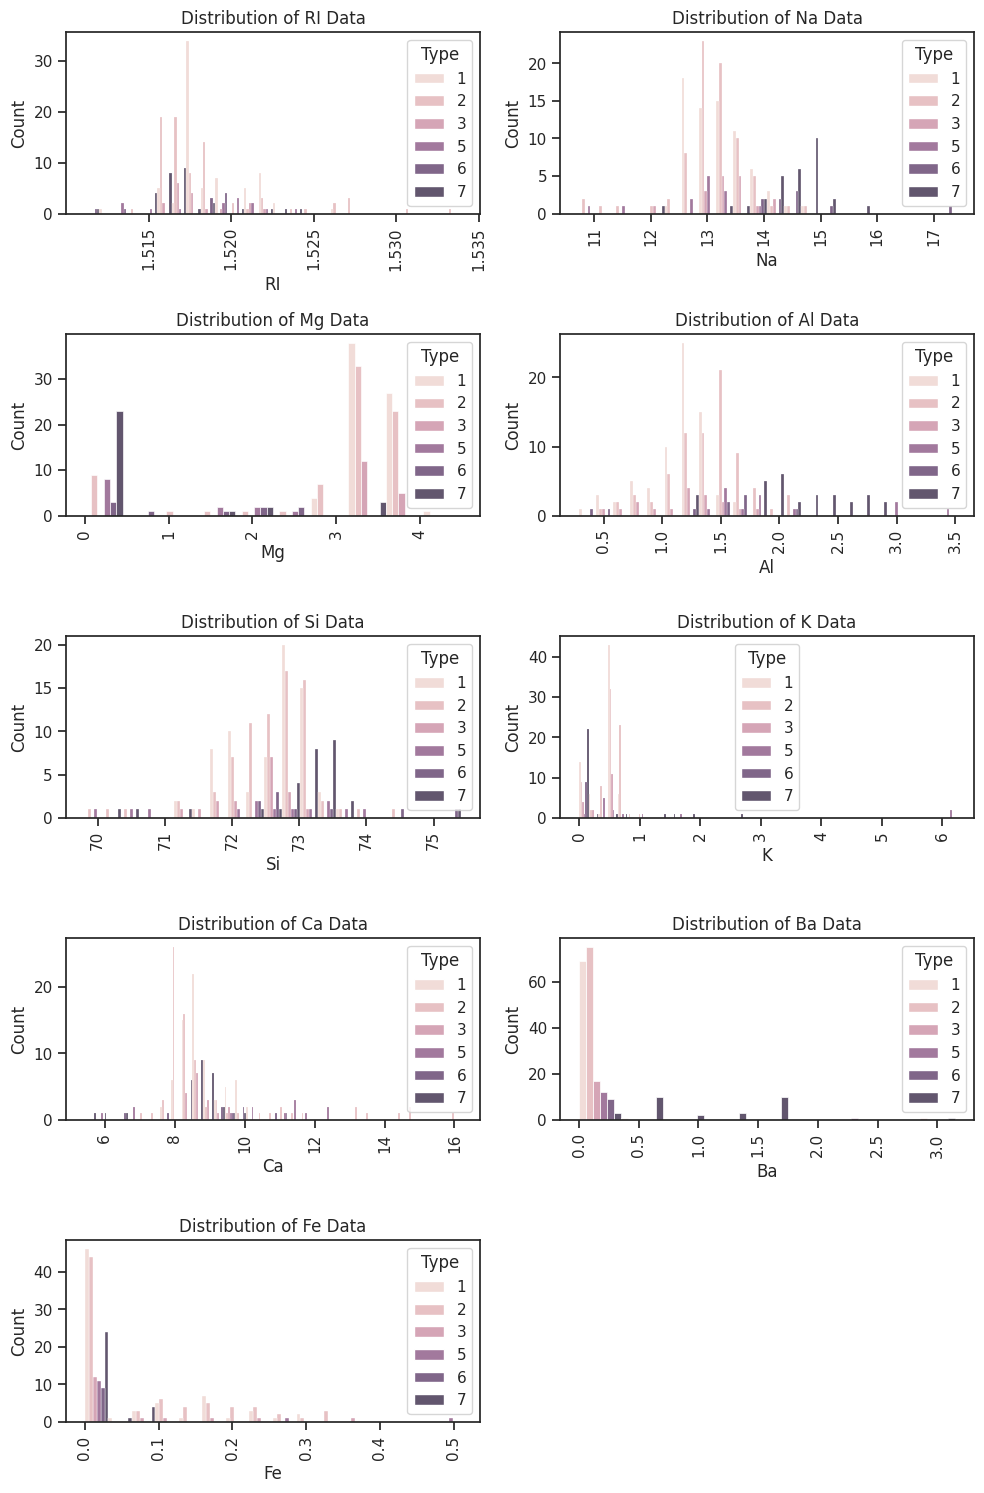

In [ ]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sns.histplot(x = df[col], hue = df["Type"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

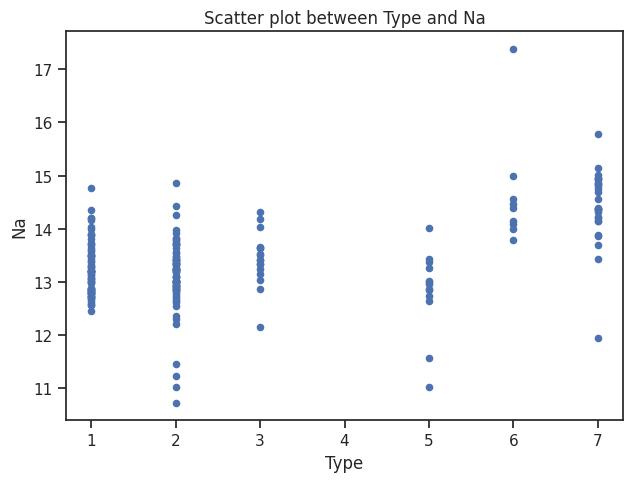

<Figure size 640x480 with 0 Axes>

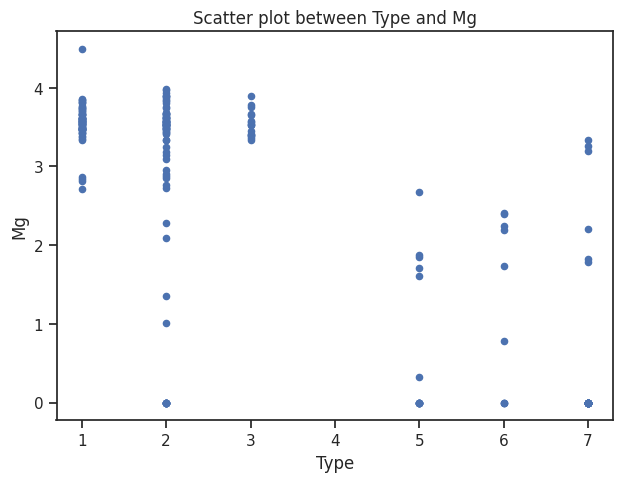

<Figure size 640x480 with 0 Axes>

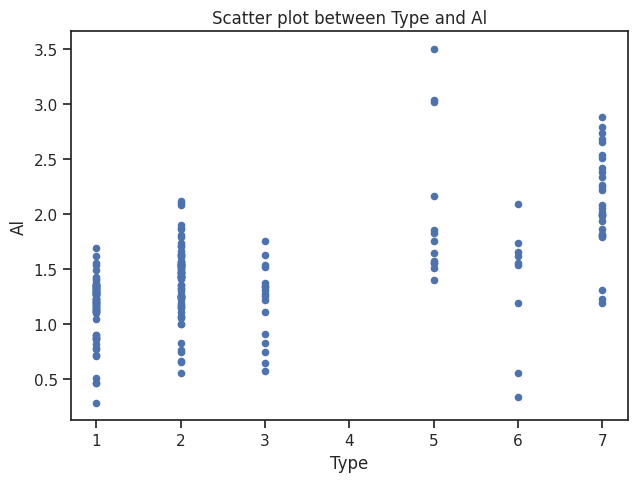

<Figure size 640x480 with 0 Axes>

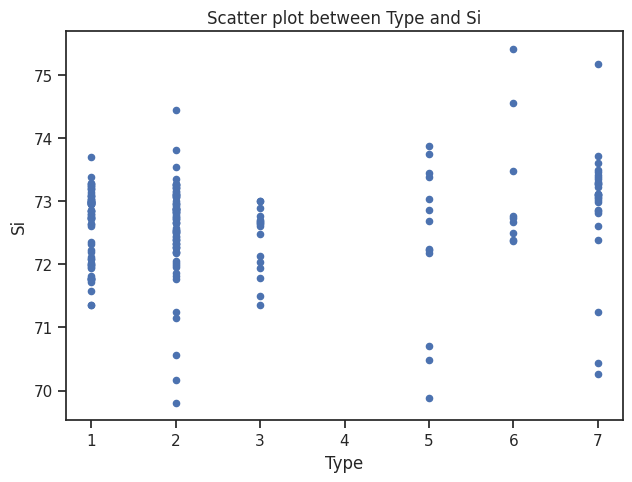

<Figure size 640x480 with 0 Axes>

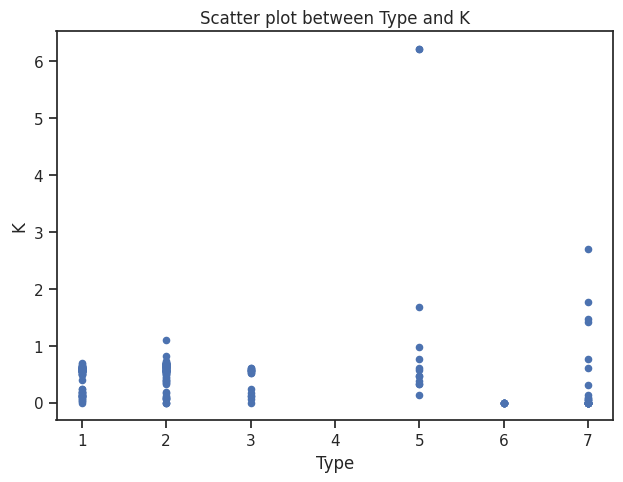

<Figure size 640x480 with 0 Axes>

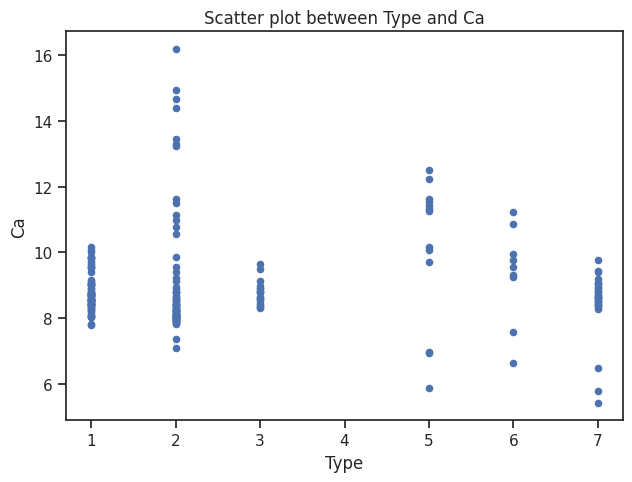

<Figure size 640x480 with 0 Axes>

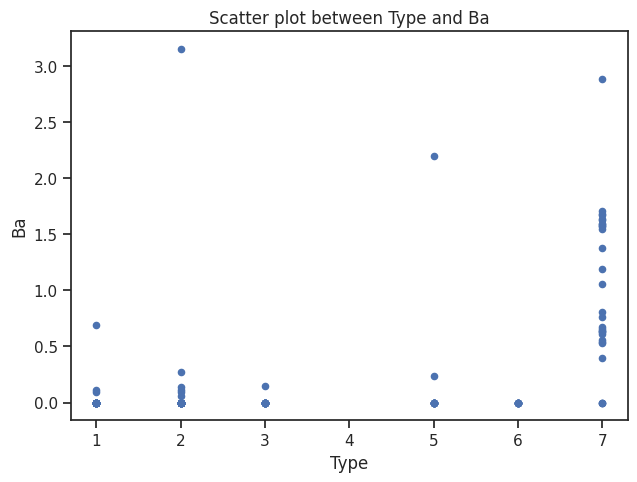

<Figure size 640x480 with 0 Axes>

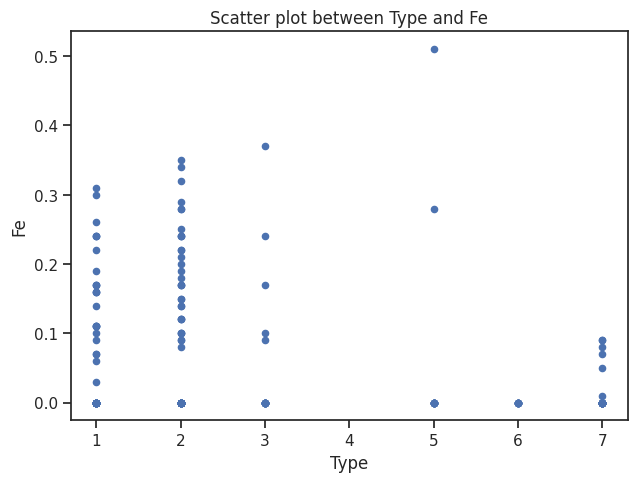

In [ ]:
columns = df.drop("Type", axis = 1).columns
for i in range(len(columns)):
        plt.figure()
        df.plot.scatter(x='Type', y=columns[i])
        plt.title(f'Scatter plot between Type and {columns[i]}')
        plt.show()


In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Shape of your Data Set loaded: (214, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 dupl

Number of All Scatter Plots = 45


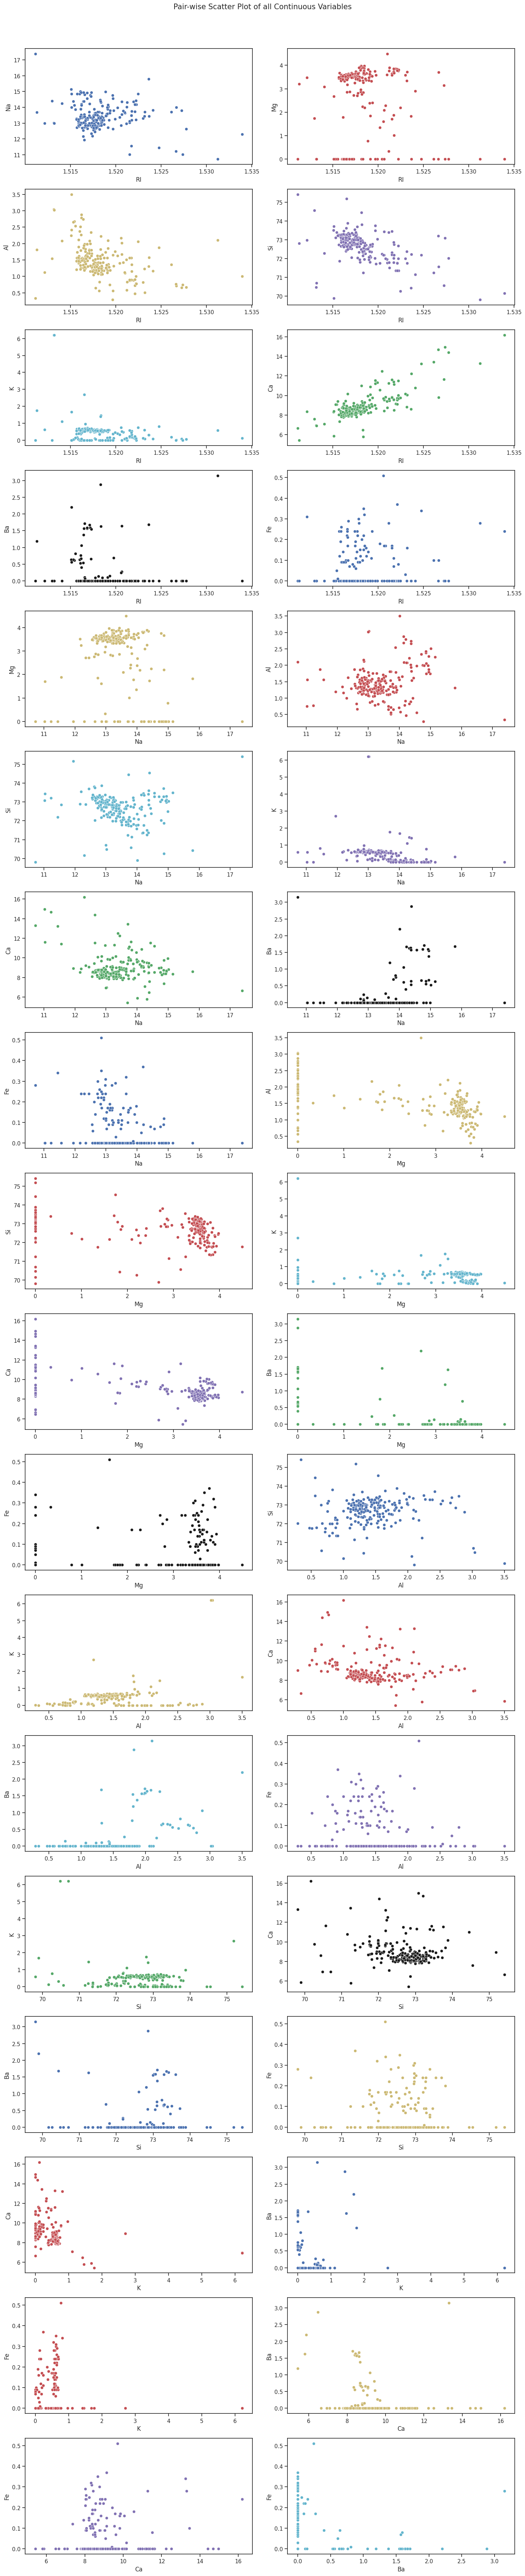

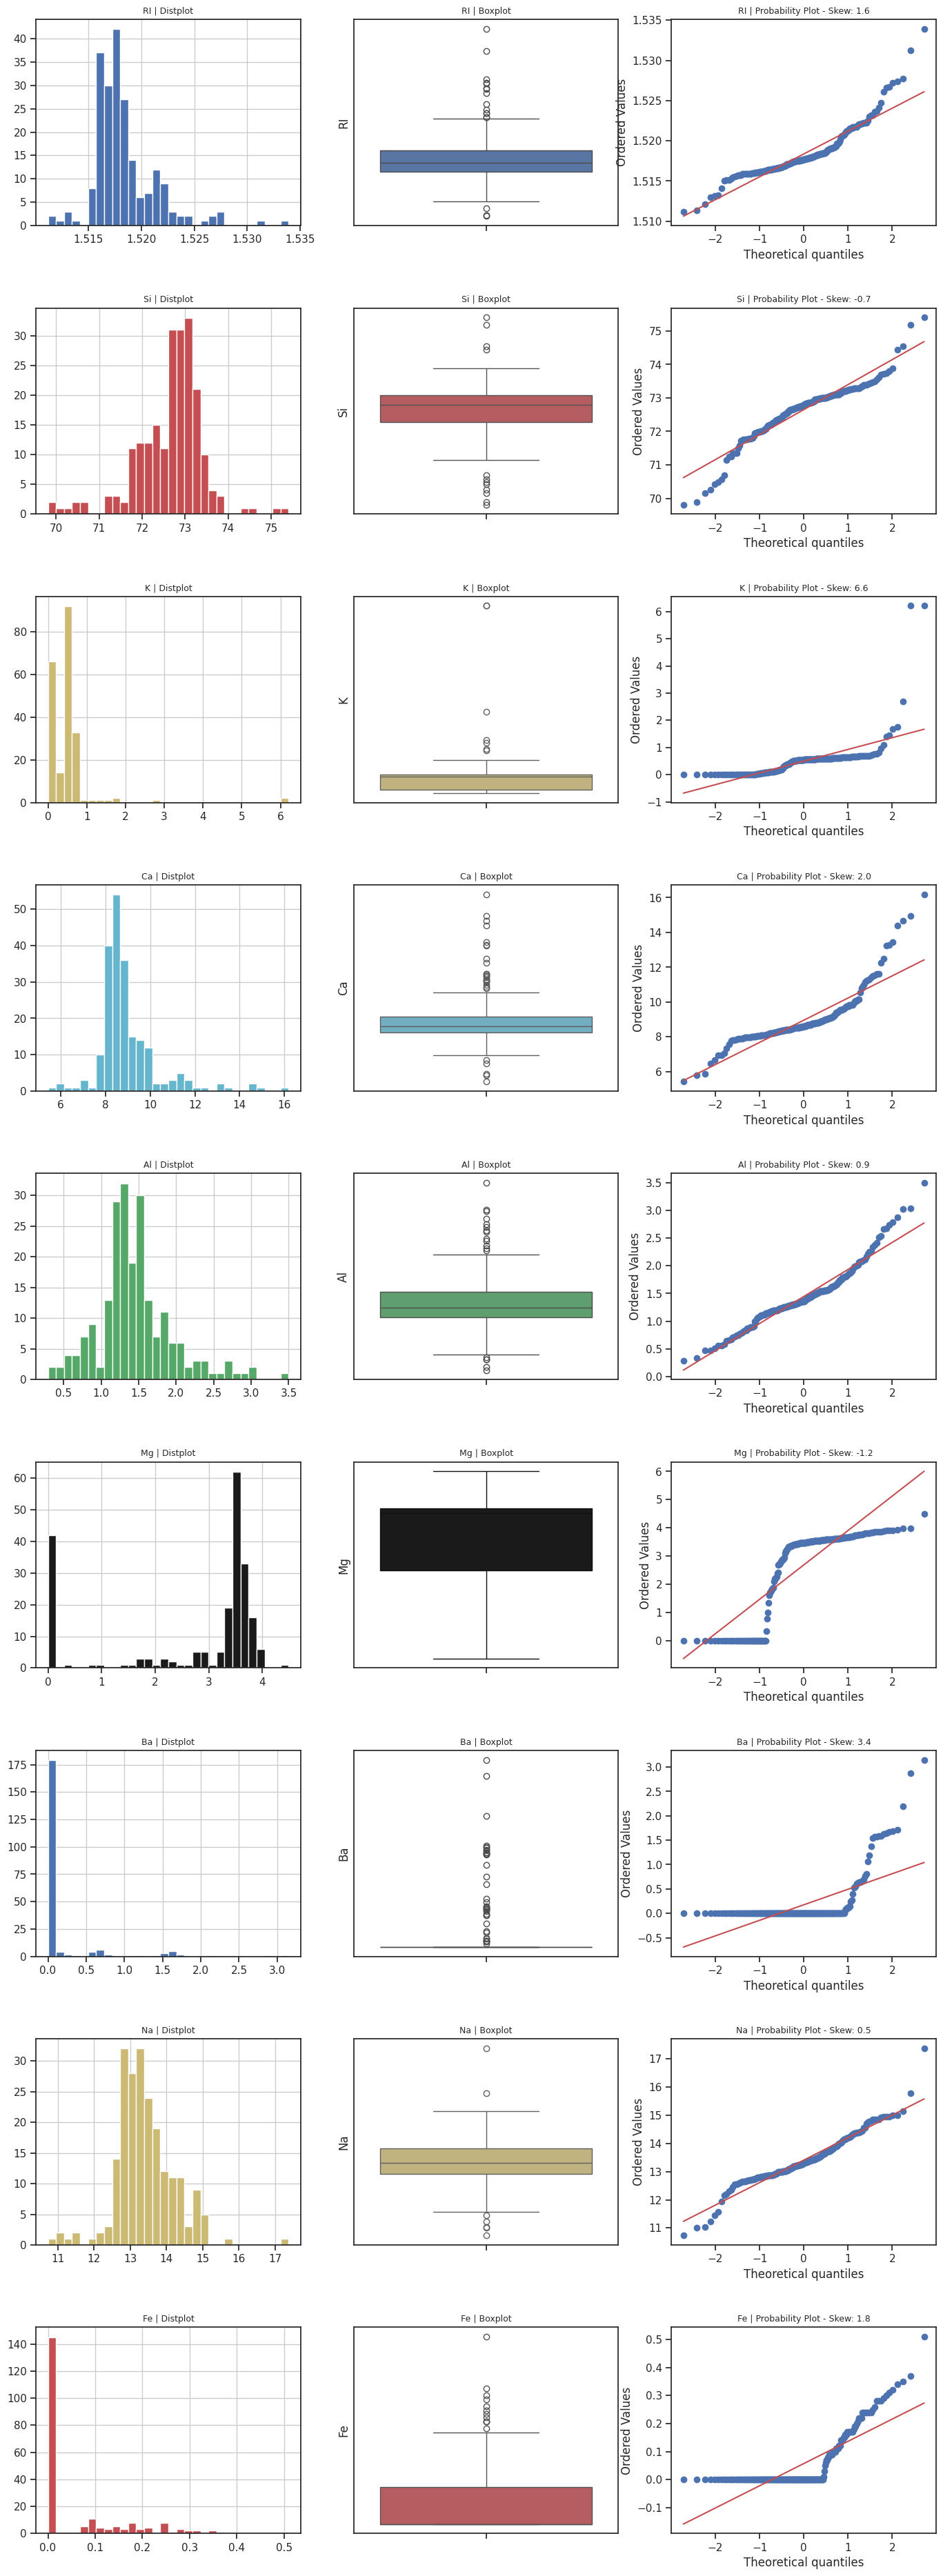

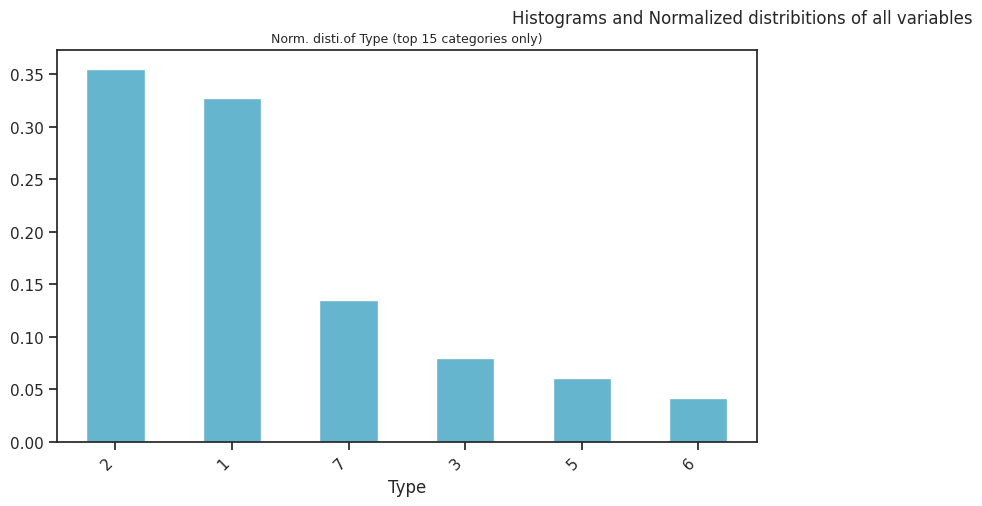

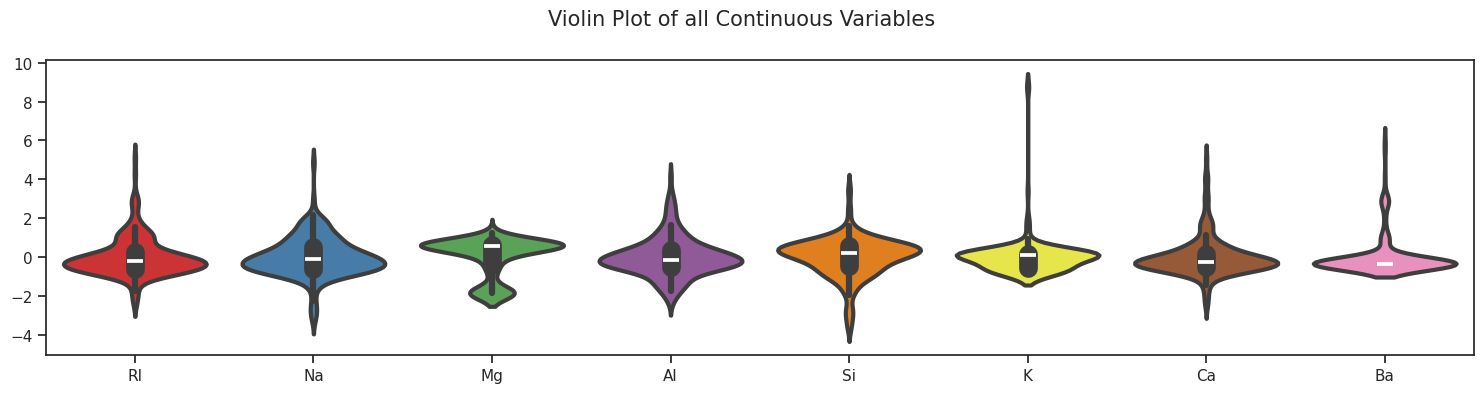

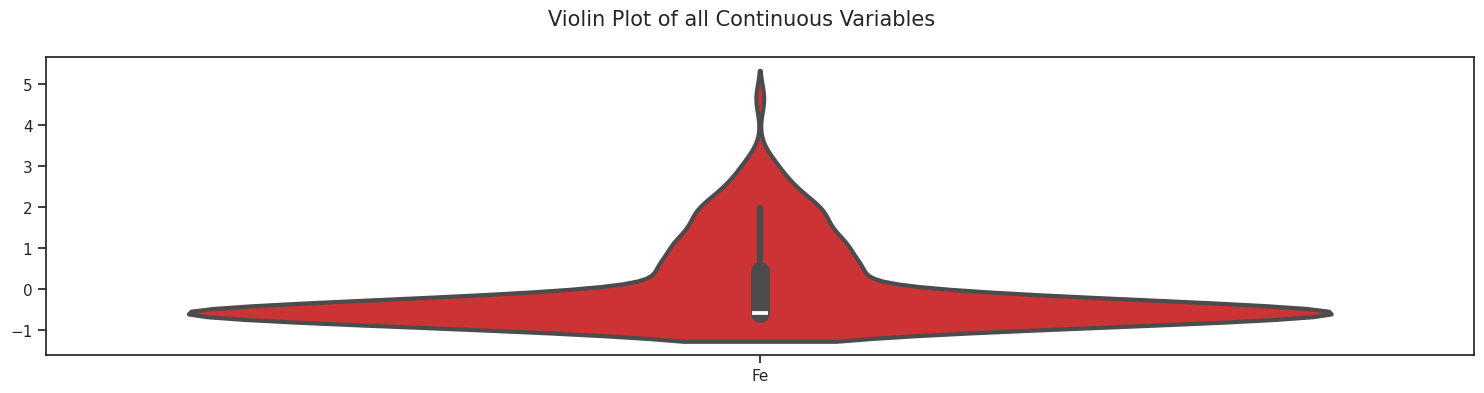

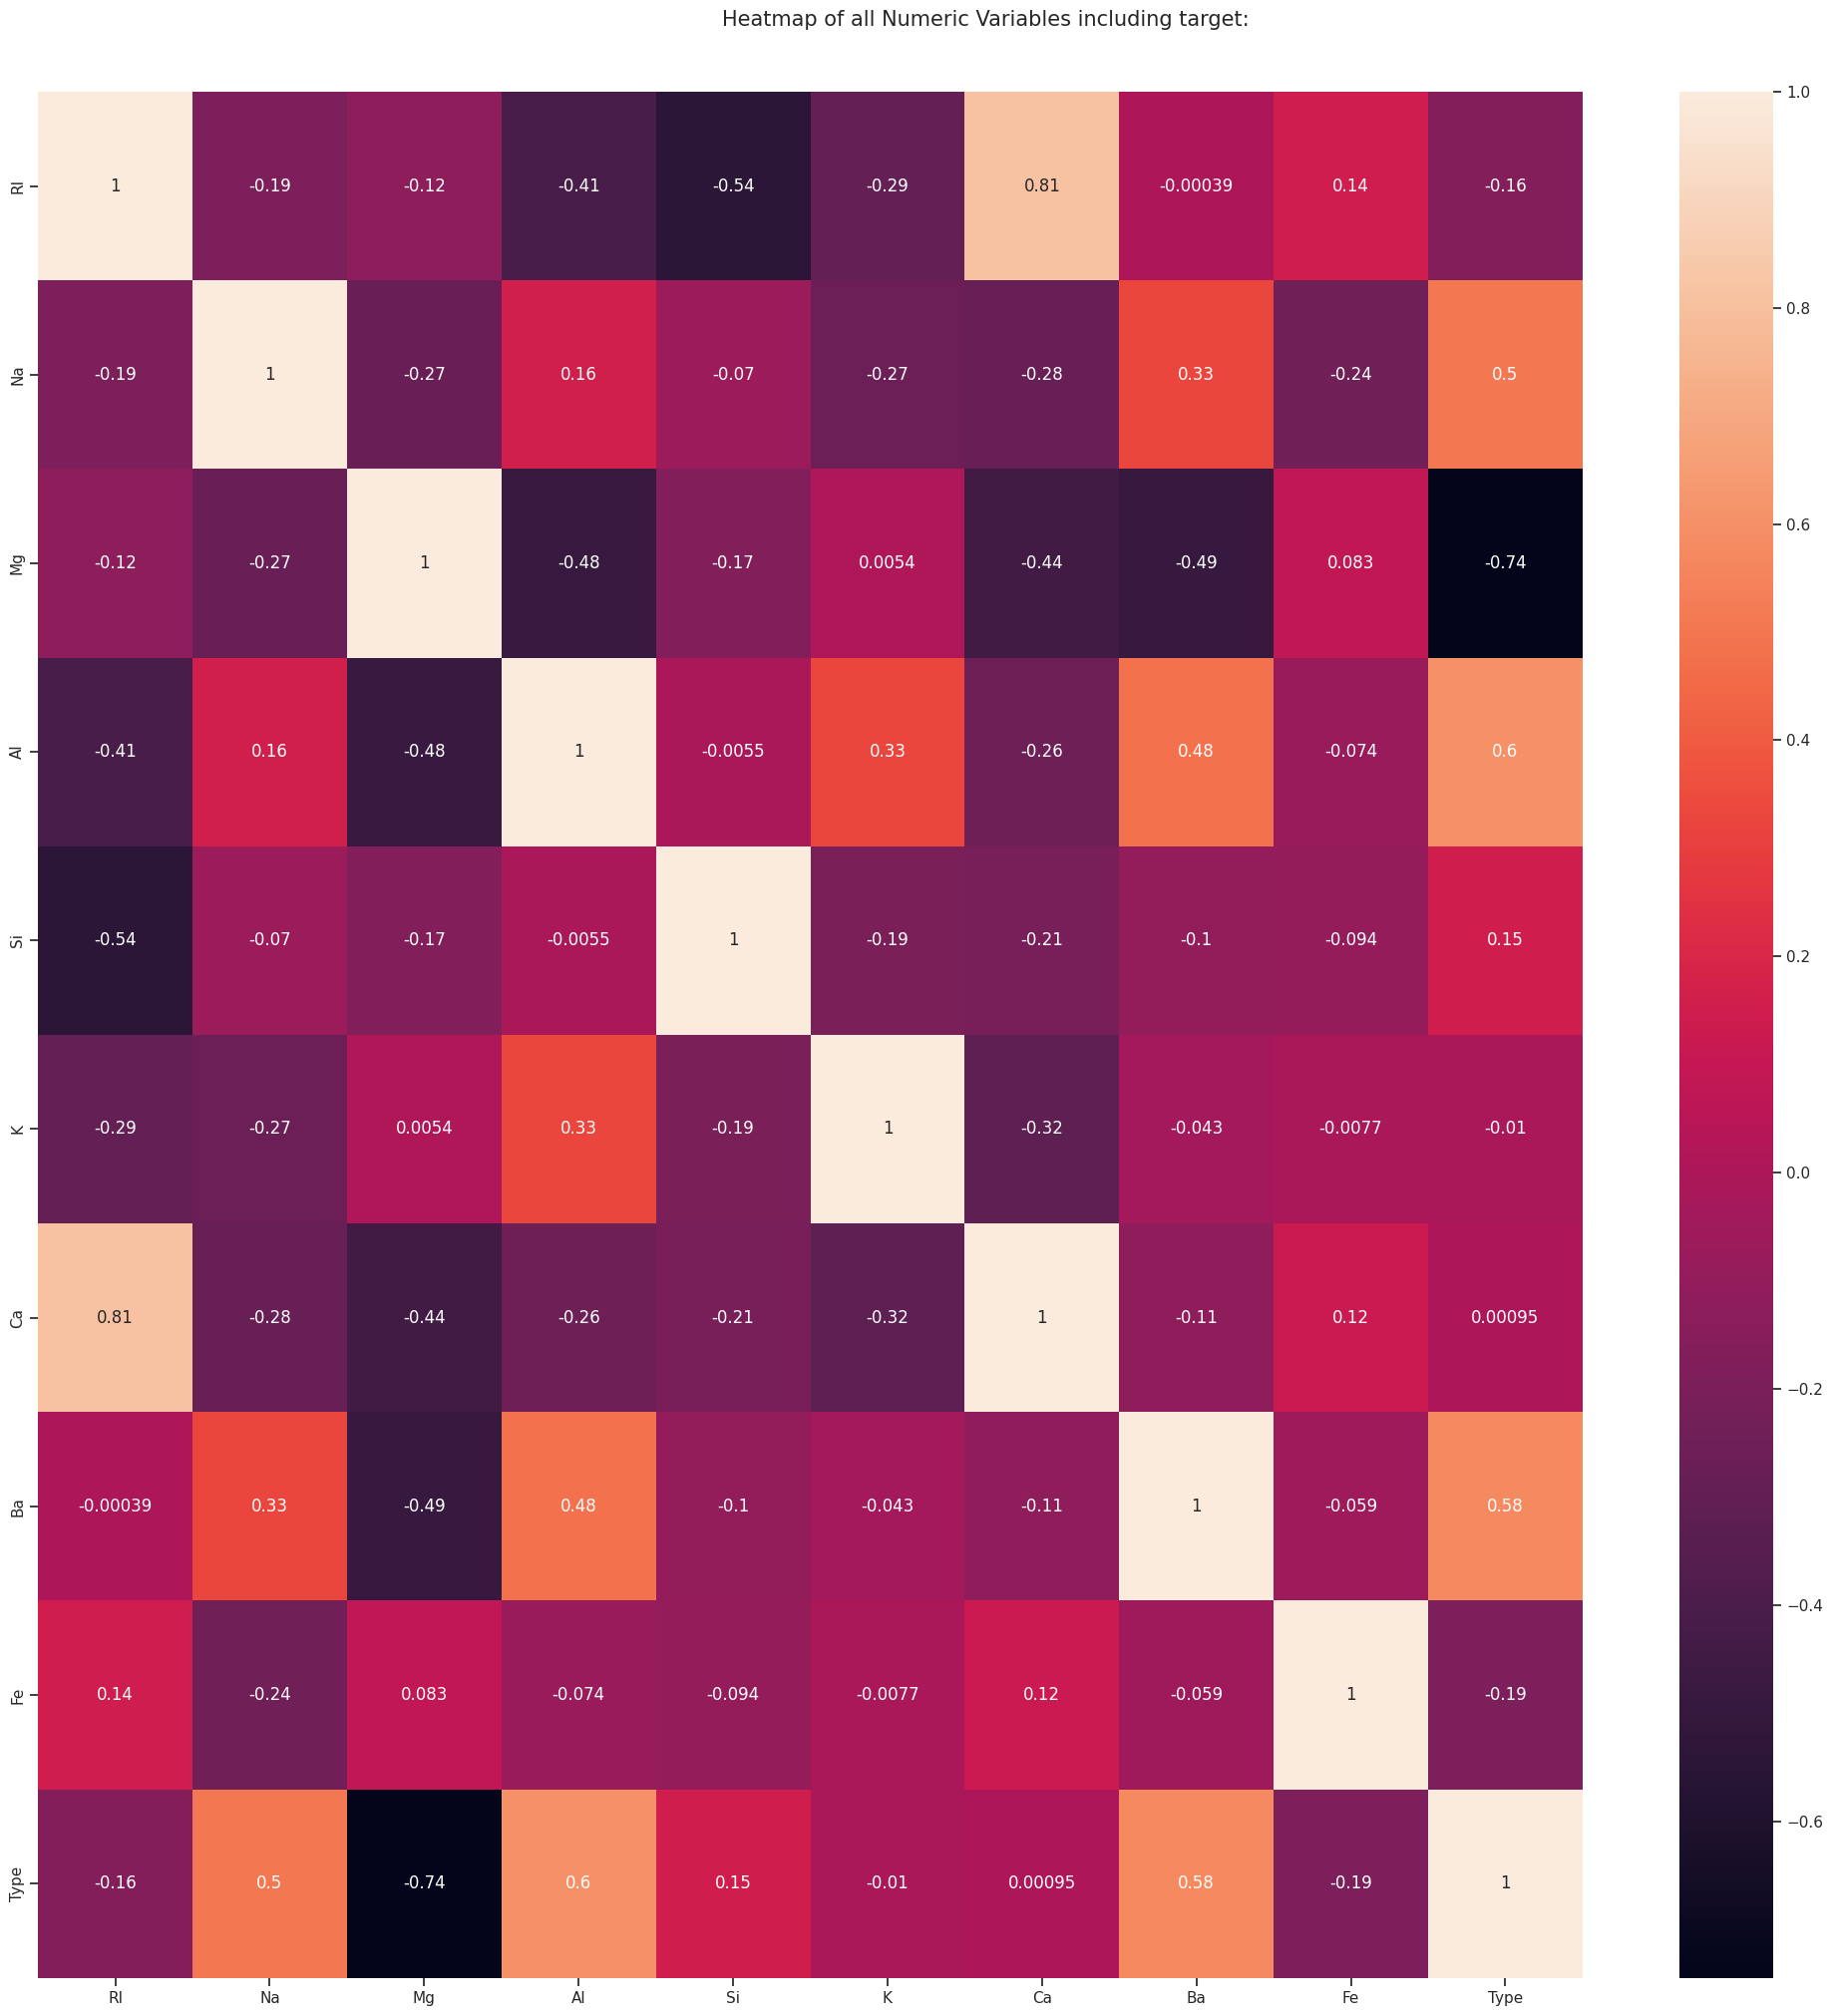

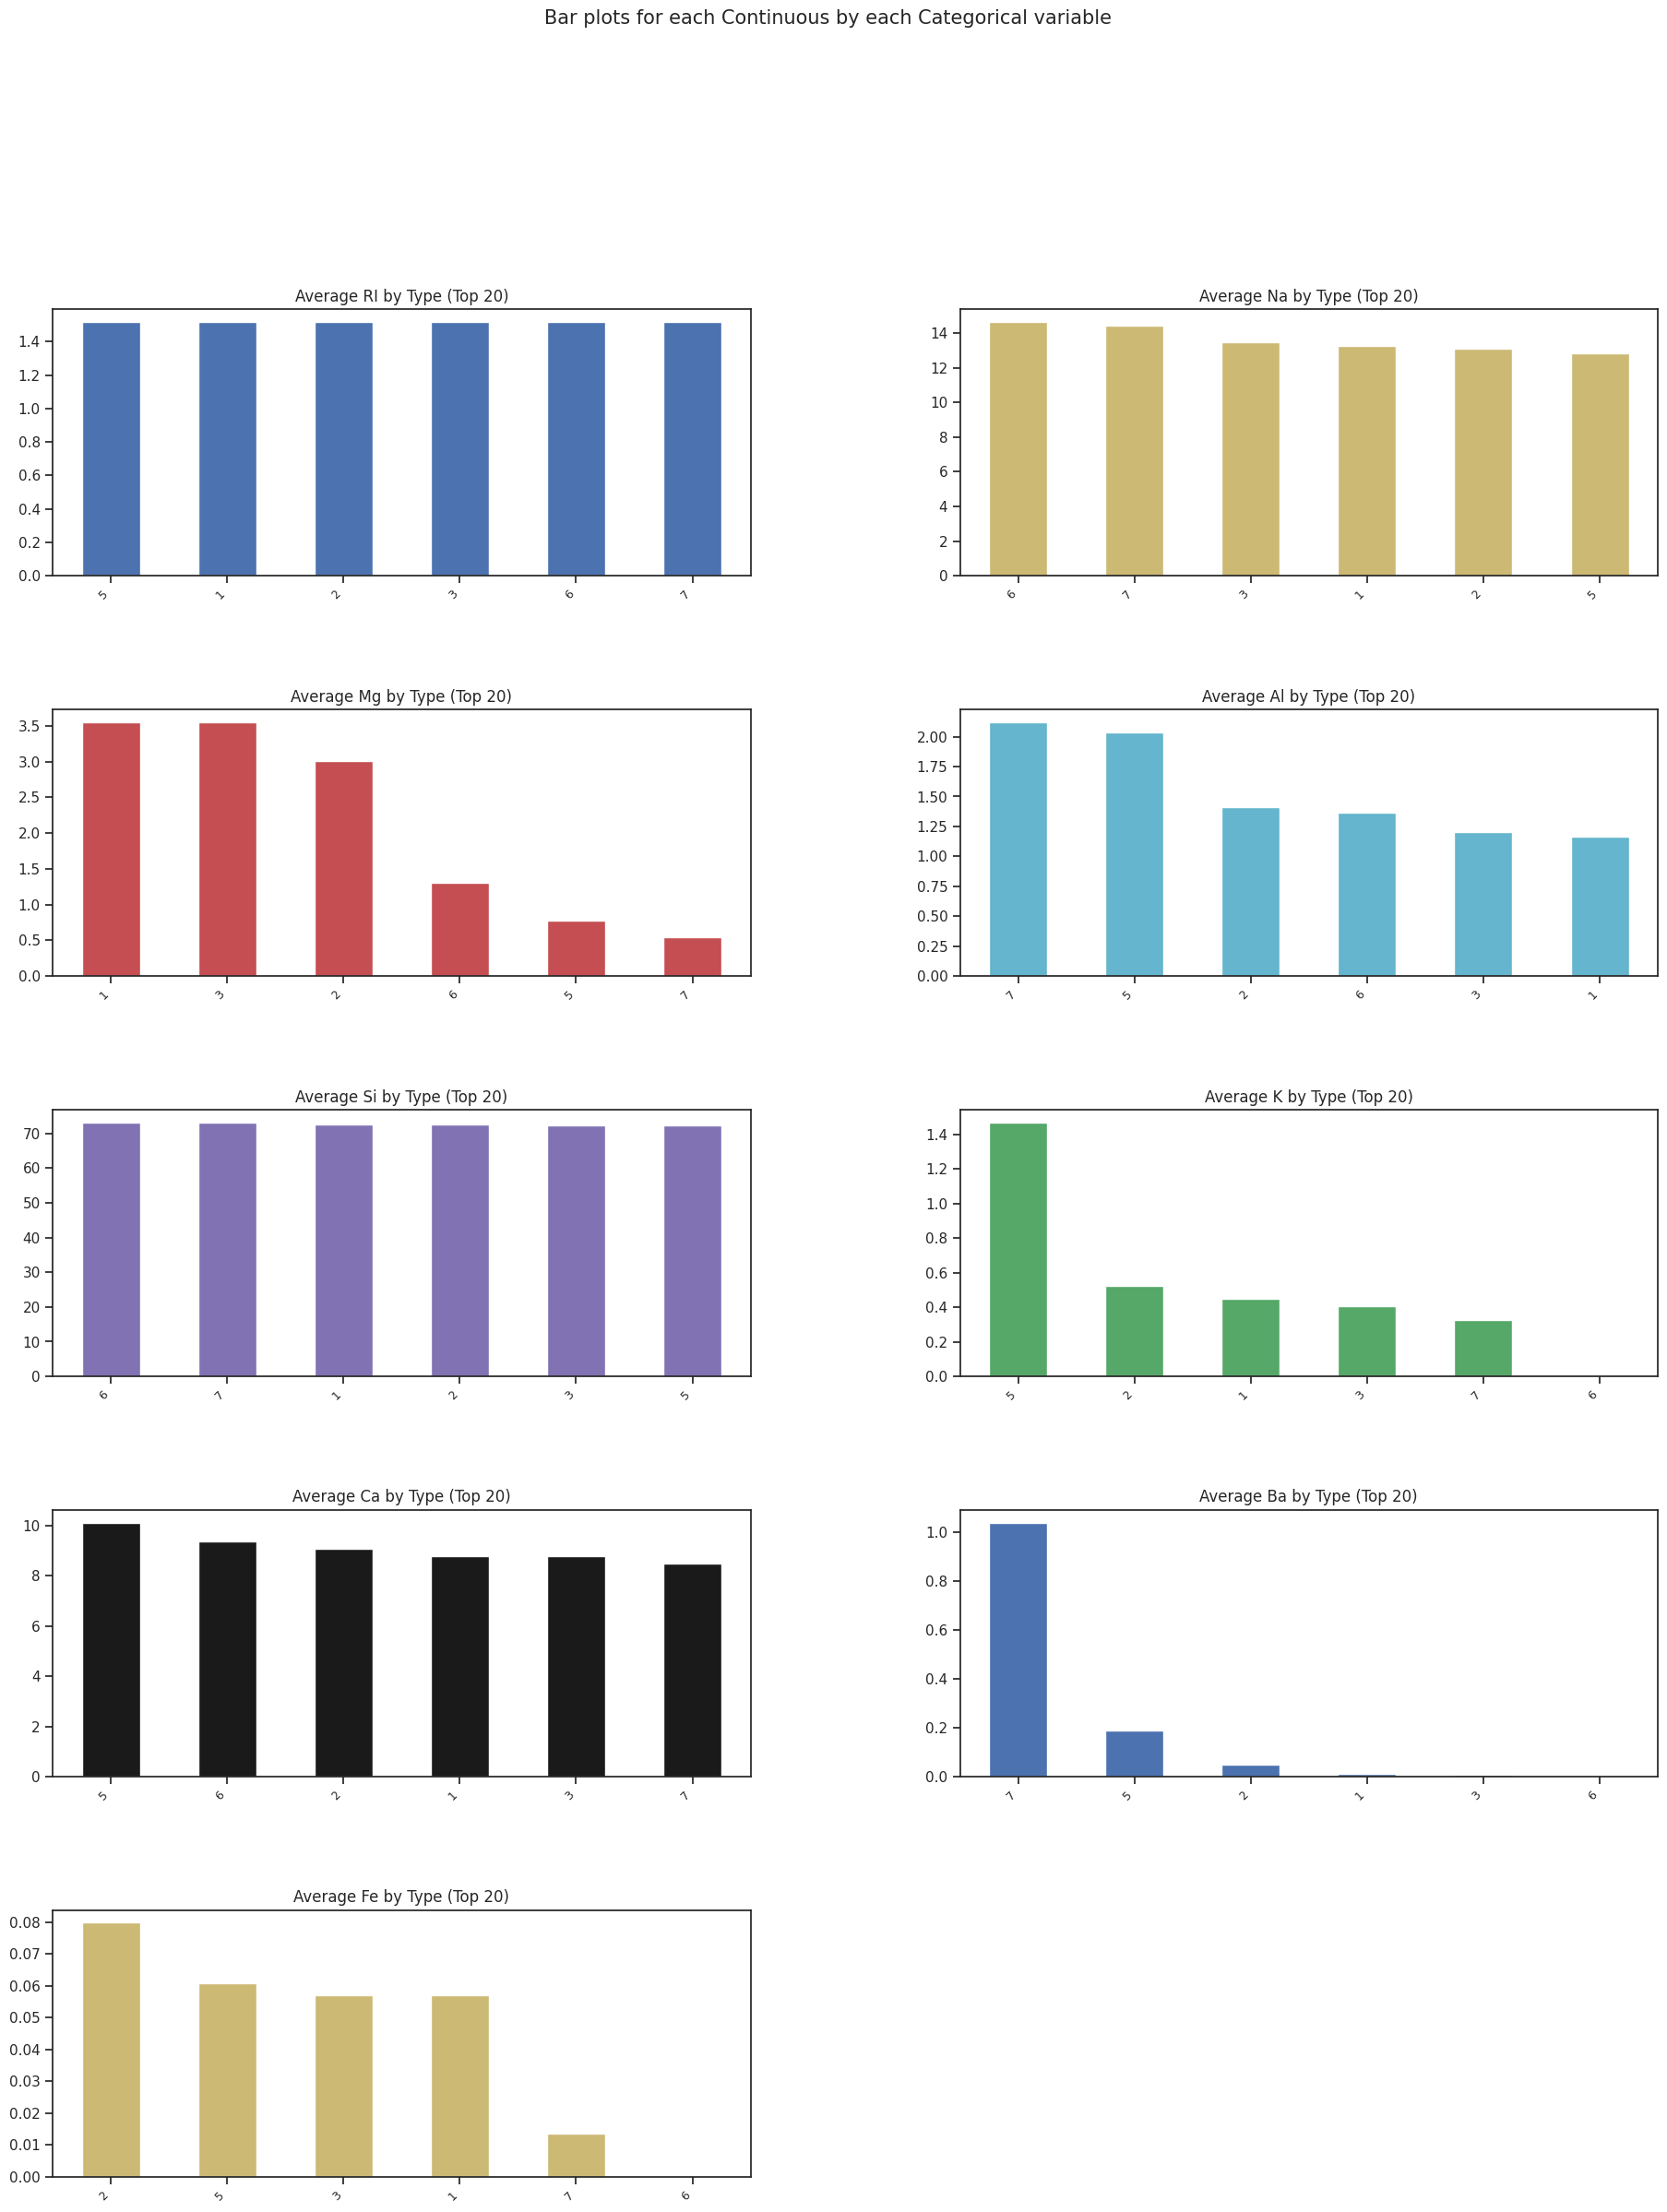

All Plots done
Time to run AutoViz = 17 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(df)

In [ ]:
# Correlation of Type
df_corr = df.corr().abs()
df_corr["Type"].sort_values(ascending = False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

# 5. Preprocess Data

In [ ]:
# df=pd.read_csv("glass.csv")
X = df.drop(columns=['Type'])  # Features
y = df['Type']  # Target column
df.describe()

RI          Na          Mg          Al          Si           K      \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

           Ca          Ba          Fe         Type     
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

## Scale the features

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

RI          Na          Mg          Al          Si           K      \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.316744    0.402684    0.597891    0.359784    0.507310    0.080041   
std      0.133313    0.122798    0.321249    0.155536    0.138312    0.105023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.235843    0.327444    0.471047    0.280374    0.441071    0.019726   
50%      0.286655    0.386466    0.775056    0.333333    0.532143    0.089372   
75%      0.351514    0.465414    0.801782    0.417445    0.585268    0.098229   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Ca          Ba          Fe      
count  214.000000  214.000000  214.000000  
mean     0.327785    0.055570    0.111783  
std      0.132263    0.157847    0.191056  
min      0.000000    0.000000    0.000000  
25%      0.261152    0.000000    0.000000  
50%      0.294610    0.000000    0.000000  
75%      0.347816    0.000000    0.196078  
max      1.000000    1.000000    1.000000

##Chia dataset thành traning set và test set theo tỉ lệ và random seed 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

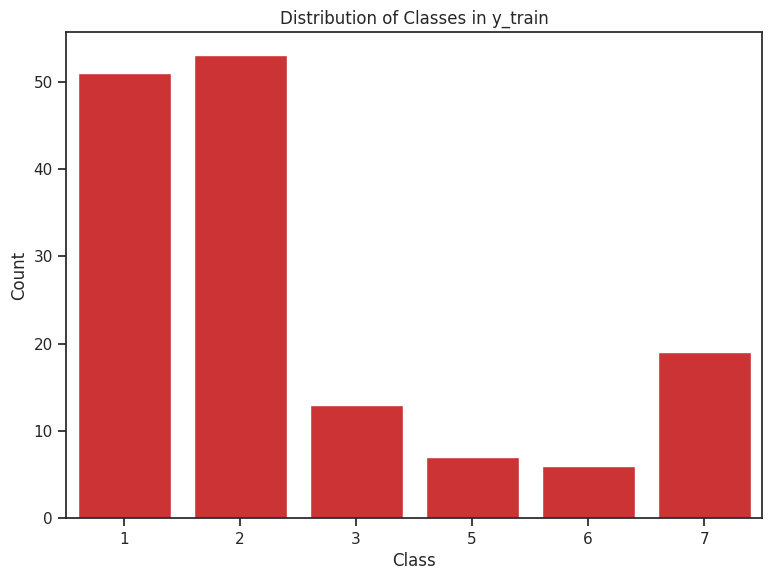

In [ ]:
# Giả sử y_train là nhãn tương ứng với X_train
plt.figure(figsize=(8, 6))

# Vẽ biểu đồ đếm các lớp trong y_train
sns.countplot(x=y_train)

# Đặt tiêu đề và nhãn
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

##OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Khởi tạo đối tượng SMOTE
smote = SMOTE(random_state=42)

# Áp dụng SMOTE để oversample tập dữ liệu huấn luyện
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra phân bổ các lớp sau khi oversampling
print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before oversampling: Counter({2: 53, 1: 51, 7: 19, 3: 13, 5: 7, 6: 6})
Class distribution after oversampling: Counter({2: 53, 1: 53, 6: 53, 5: 53, 3: 53, 7: 53})


# 6. Build classification models using the data

biến lưu kết quả thực nghiệm

In [ ]:
base_mean = [0] * 10
base_test = [0] * 10
scaler_mean = [0] * 10
scaler_test = [0] * 10
oversmapling_mean = [0] * 10
oversmapling_test = [0] * 10

##Khởi tạo K-fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

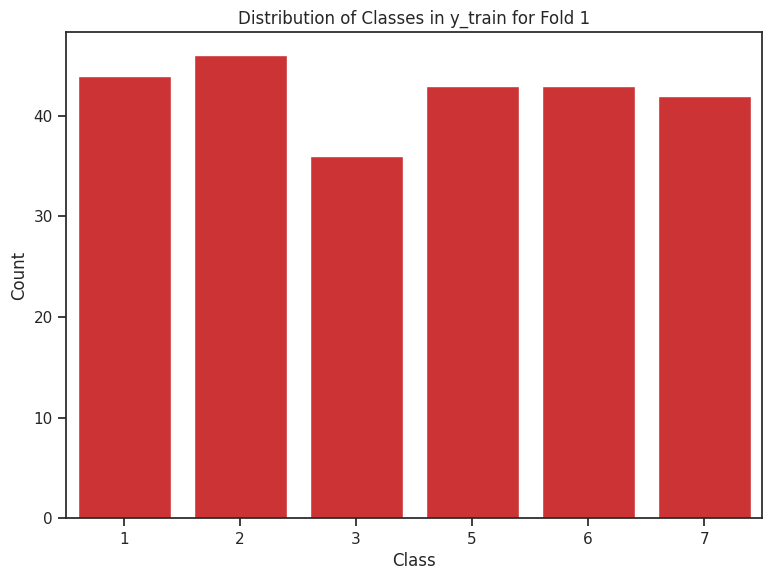

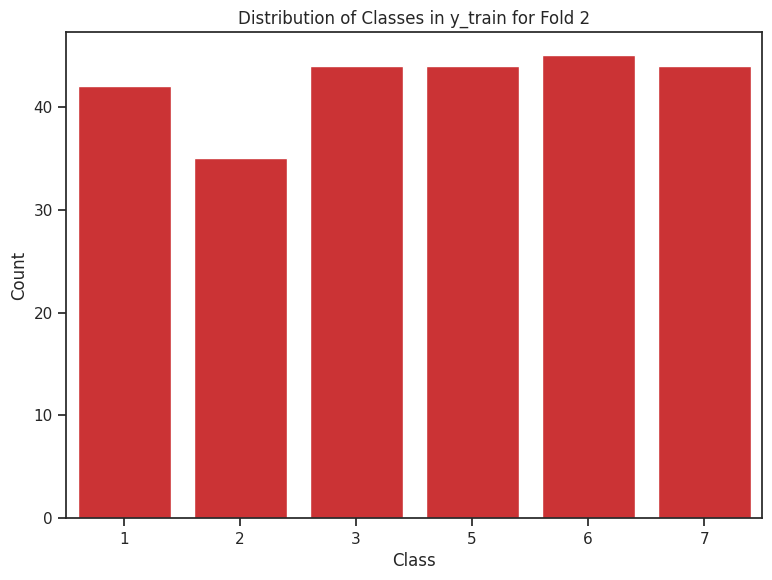

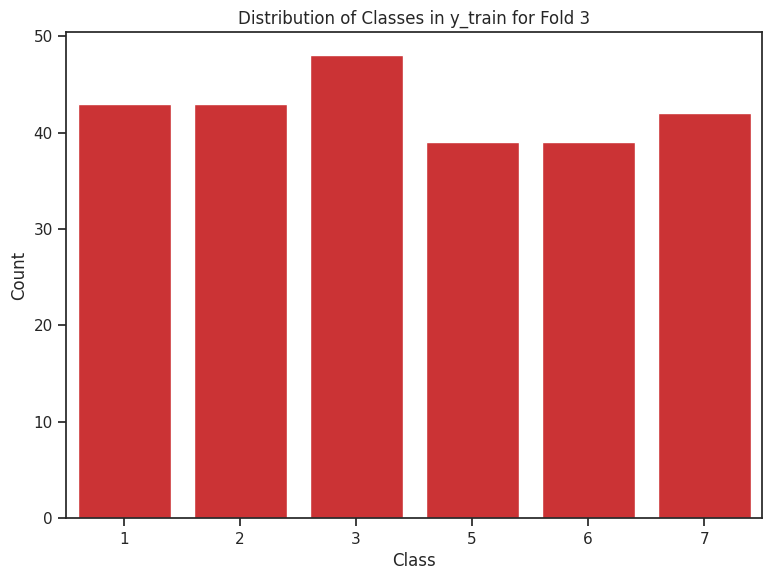

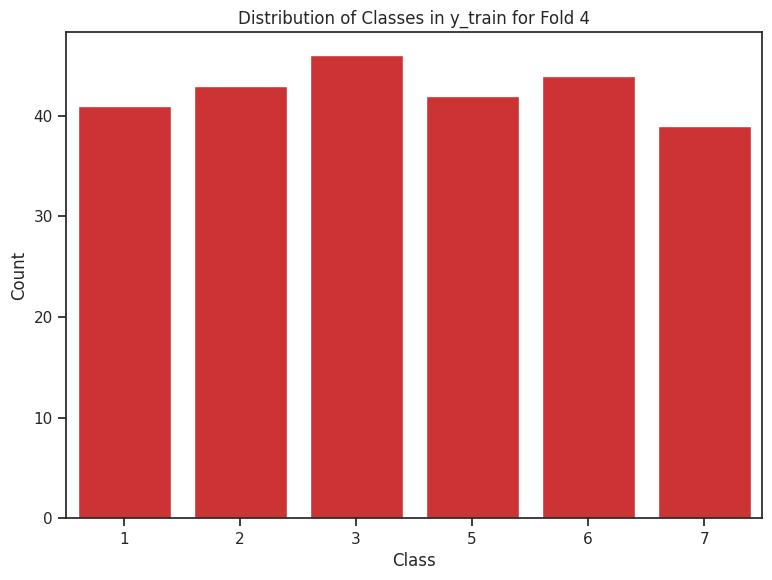

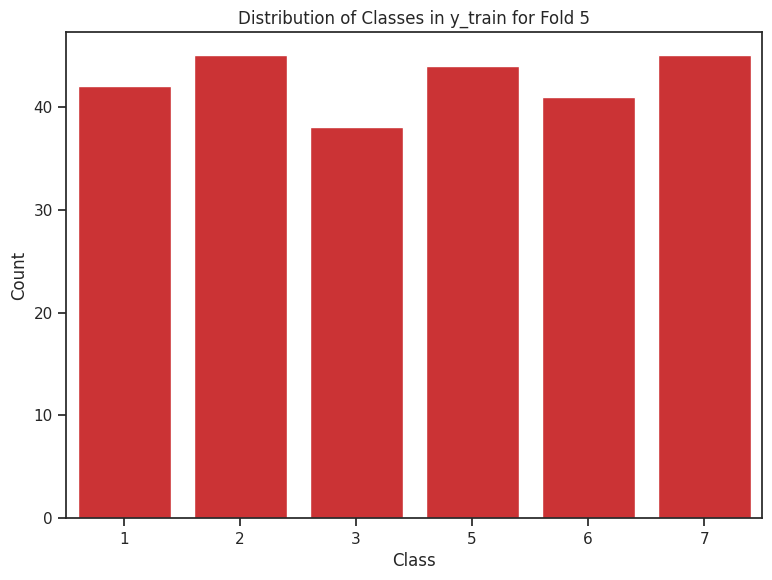

In [ ]:
# Giả sử y là nhãn cho toàn bộ dữ liệu và X là dữ liệu tương ứng
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Chạy qua từng fold trong K-Fold
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled)):
    # Chia dữ liệu sau khi đã oversampling thành tập huấn luyện và kiểm tra
    X_train_fold = X_resampled.iloc[train_index] if isinstance(X_resampled, pd.DataFrame) else X_resampled[train_index]
    X_test_fold = X_resampled.iloc[test_index] if isinstance(X_resampled, pd.DataFrame) else X_resampled[test_index]

    y_train_fold, y_test_fold = y_resampled[train_index], y_resampled[test_index]

    # Vẽ biểu đồ phân bổ các lớp trong fold hiện tại
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_train_fold)
    plt.title(f'Distribution of Classes in y_train for Fold {fold + 1}')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.show()

##KNN

Base

In [ ]:
# kNN classifier
knn = KNeighborsClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"kNN - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Đánh giá kết quả
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"kNN - Test Accuracy: {knn_accuracy:.4f}")
base_test[0] = knn_accuracy

Cross-validation scores for each fold: [0.6        0.8        0.66666667 0.5        0.51724138]
kNN - Mean CV Accuracy: 0.6168 (+/- 0.1094)
kNN - Test Accuracy: 0.5846


Oversampling

In [ ]:
# kNN classifier
knn = KNeighborsClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(knn, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"kNN - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# Đánh giá kết quả
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"kNN - Test Accuracy: {knn_accuracy:.4f}")
oversmapling_test[0] = knn_accuracy

Cross-validation scores for each fold: [0.8125     0.78125    0.875      0.82539683 0.77777778]
kNN - Mean CV Accuracy: 0.8144 (+/- 0.0353)
kNN - Test Accuracy: 0.6769


Scaler

In [ ]:
# kNN classifier
knn = KNeighborsClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
knn_scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f"kNN - Mean CV Accuracy: {np.mean(knn_scores):.4f} (+/- {np.std(knn_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
knn.fit(X_train_scaled, y_train_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Đánh giá kết quả
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"kNN - Test Accuracy: {knn_accuracy:.4f}")
scaler_test[0] = knn_accuracy

Cross-validation scores for each fold: [0.73333333 0.83333333 0.76666667 0.56666667 0.51724138]
kNN - Mean CV Accuracy: 0.6834 (+/- 0.1209)
kNN - Test Accuracy: 0.5692


##Naive Bayes

Base

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Naive Bayes classifier
naive_bayes = GaussianNB()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Naive Bayes - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập đã được resampling và dự đoán trên tập test
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Đánh giá kết quả trên tập test
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Test Accuracy: {nb_accuracy:.4f}")
base_test[1] = nb_accuracy

Cross-validation scores for each fold: [0.13333333 0.33333333 0.23333333 0.3        0.4137931 ]
Naive Bayes - Mean CV Accuracy: 0.2828 (+/- 0.0947)
Naive Bayes - Test Accuracy: 0.3077


Oversampling

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Naive Bayes classifier
naive_bayes = GaussianNB()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(naive_bayes, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Naive Bayes - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập đã được resampling và dự đoán trên tập test
naive_bayes.fit(X_resampled, y_resampled)
y_pred_nb = naive_bayes.predict(X_test)

# Đánh giá kết quả trên tập test
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Test Accuracy: {nb_accuracy:.4f}")
oversmapling_test[1] = nb_accuracy

Cross-validation scores for each fold: [0.640625   0.515625   0.640625   0.6031746  0.65079365]
Naive Bayes - Mean CV Accuracy: 0.6102 (+/- 0.0500)
Naive Bayes - Test Accuracy: 0.3538


Scaler

In [ ]:
# Naive Bayes classifier
naive_bayes = GaussianNB()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(naive_bayes, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Naive Bayes - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập đã được resampling và dự đoán trên tập test
naive_bayes.fit(X_train_scaled, y_train_scaled)
y_pred_nb = naive_bayes.predict(X_test_scaled)

# Đánh giá kết quả trên tập test
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Test Accuracy: {nb_accuracy:.4f}")
scaler_test[1] = nb_accuracy

Cross-validation scores for each fold: [0.13333333 0.33333333 0.23333333 0.3        0.4137931 ]
Naive Bayes - Mean CV Accuracy: 0.2828 (+/- 0.0947)
Naive Bayes - Test Accuracy: 0.3077


##Decision Tree

Base

In [ ]:
# Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Decision Tree - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Đánh giá kết quả
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Test Accuracy: {dt_accuracy:.4f}")
base_test[2] = dt_accuracy

Cross-validation scores for each fold: [0.46666667 0.7        0.6        0.63333333 0.5862069 ]
Decision Tree - Mean CV Accuracy: 0.5972 (+/- 0.0762)
Decision Tree - Test Accuracy: 0.6154


Oversampling

In [ ]:
# Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Decision Tree - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
decision_tree.fit(X_resampled, y_resampled)
y_pred_dt = decision_tree.predict(X_test)

# Đánh giá kết quả
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Test Accuracy: {dt_accuracy:.4f}")
oversmapling_test[2] = dt_accuracy

Cross-validation scores for each fold: [0.875      0.765625   0.875      0.80952381 0.82539683]
Decision Tree - Mean CV Accuracy: 0.8301 (+/- 0.0416)
Decision Tree - Test Accuracy: 0.6769


Scaler

In [ ]:
# Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# K-fold Cross-Validation on training data
cv_scores = cross_val_score(decision_tree, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Decision Tree - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
decision_tree.fit(X_train_scaled, y_train_scaled)
y_pred_dt = decision_tree.predict(X_test_scaled)

# Đánh giá kết quả
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Test Accuracy: {dt_accuracy:.4f}")
scaler_test[2] = dt_accuracy

Cross-validation scores for each fold: [0.5        0.7        0.63333333 0.5        0.55172414]
Decision Tree - Mean CV Accuracy: 0.5770 (+/- 0.0785)
Decision Tree - Test Accuracy: 0.6615


##Random Forest

Base

In [ ]:
# Random Forest classifier
random_forest = RandomForestClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Random Forest - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Đánh giá kết quả
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Test Accuracy: {rf_accuracy:.4f}")
base_test[3] = rf_accuracy

Cross-validation scores for each fold: [0.8        0.83333333 0.76666667 0.56666667 0.82758621]
Random Forest - Mean CV Accuracy: 0.7589 (+/- 0.0990)
Random Forest - Test Accuracy: 0.7538


Oversampling

In [ ]:
# Random Forest classifier
random_forest = RandomForestClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(random_forest, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Random Forest - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
random_forest.fit(X_resampled, y_resampled)
y_pred_rf = random_forest.predict(X_test)

# Đánh giá kết quả
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Test Accuracy: {rf_accuracy:.4f}")
oversmapling_test[3] = rf_accuracy

Cross-validation scores for each fold: [0.875     0.828125  0.96875   0.9047619 0.9047619]
Random Forest - Mean CV Accuracy: 0.8963 (+/- 0.0458)
Random Forest - Test Accuracy: 0.6923


Scaler

In [ ]:
# Random Forest classifier
random_forest = RandomForestClassifier()

# K-fold Cross-Validation
cv_scores = cross_val_score(random_forest, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Random Forest - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
random_forest.fit(X_train_scaled, y_train_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Đánh giá kết quả
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Test Accuracy: {rf_accuracy:.4f}")
scaler_test[3] = rf_accuracy

Cross-validation scores for each fold: [0.73333333 0.83333333 0.8        0.66666667 0.75862069]
Random Forest - Mean CV Accuracy: 0.7584 (+/- 0.0573)
Random Forest - Test Accuracy: 0.8000


##Logistic Regression

Base

In [ ]:
# Logistic Regression classifier
logistic_regression = LogisticRegression()

# K-fold Cross-Validation
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Logistic Regression - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Đánh giá kết quả
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Test Accuracy: {lr_accuracy:.4f}")
base_test[4] = lr_accuracy

Cross-validation scores for each fold: [0.63333333 0.73333333 0.66666667 0.36666667 0.34482759]
Logistic Regression - Mean CV Accuracy: 0.5490 (+/- 0.1612)
Logistic Regression - Test Accuracy: 0.6615


Oversampling

In [ ]:
# Logistic Regression classifier
logistic_regression = LogisticRegression()

# K-fold Cross-Validation
cv_scores = cross_val_score(logistic_regression, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Logistic Regression - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
logistic_regression.fit(X_resampled, y_resampled)
y_pred_lr = logistic_regression.predict(X_test)

# Đánh giá kết quả
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Test Accuracy: {lr_accuracy:.4f}")
oversmapling_test[4] = lr_accuracy

Cross-validation scores for each fold: [0.640625   0.625      0.671875   0.71428571 0.6031746 ]
Logistic Regression - Mean CV Accuracy: 0.6510 (+/- 0.0388)
Logistic Regression - Test Accuracy: 0.6769


Scaler

In [ ]:
# Logistic Regression classifier
logistic_regression = LogisticRegression()

# K-fold Cross-Validation
cv_scores = cross_val_score(logistic_regression, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f"Logistic Regression - Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Huấn luyện trên tập train và dự đoán trên tập test
logistic_regression.fit(X_train_scaled, y_train_scaled)
y_pred_lr = logistic_regression.predict(X_test_scaled)

# Đánh giá kết quả
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Test Accuracy: {lr_accuracy:.4f}")
scaler_test[4] = lr_accuracy

Cross-validation scores for each fold: [0.53333333 0.6        0.6        0.36666667 0.48275862]
Logistic Regression - Mean CV Accuracy: 0.5166 (+/- 0.0870)
Logistic Regression - Test Accuracy: 0.5385


##Ada Boost Classifier

Base

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Use AdaBoost model for cross-validation
model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
base_test[5] = test_accuracy

Cross-validation scores for each fold: [0.53333333 0.4        0.5        0.5        0.37931034]
Average cross-validation score: 0.4625287356321839
Test set accuracy: 0.6


Oversampling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Use AdaBoost model for cross-validation
model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
oversmapling_test[5] = test_accuracy

Cross-validation scores for each fold: [0.765625   0.53125    0.59375    0.52380952 0.38095238]
Average cross-validation score: 0.5590773809523809
Test set accuracy: 0.4307692307692308


Scaler

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Use AdaBoost model for cross-validation
model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
scaler_test[5] = test_accuracy

Cross-validation scores for each fold: [0.53333333 0.4        0.5        0.5        0.37931034]
Average cross-validation score: 0.4625287356321839
Test set accuracy: 0.6153846153846154


##Gradient Boosting Classifier

Base

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Use Gradient Boosting model for cross-validation
model = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
base_test[6] = test_accuracy

Cross-validation scores for each fold: [0.73333333 0.86666667 0.76666667 0.46666667 0.72413793]
Average cross-validation score: 0.7114942528735633
Test set accuracy: 0.7846153846153846


Oversampling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Use Gradient Boosting model for cross-validation
model = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
oversmapling_test[6] = test_accuracy

Cross-validation scores for each fold: [0.84375    0.765625   0.875      0.76190476 0.88888889]
Average cross-validation score: 0.82703373015873
Test set accuracy: 0.6615384615384615


Scaler

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Use Gradient Boosting model for cross-validation
model = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
scaler_test[6] = test_accuracy

Cross-validation scores for each fold: [0.73333333 0.86666667 0.76666667 0.46666667 0.72413793]
Average cross-validation score: 0.7114942528735633
Test set accuracy: 0.7846153846153846


##Linear Discriminant Analysis

Base

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Use Linear Discriminant Analysis model for cross-validation
model = LinearDiscriminantAnalysis()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
base_test[7] = test_accuracy

Cross-validation scores for each fold: [0.6        0.6        0.56666667 0.56666667 0.48275862]
Average cross-validation score: 0.5632183908045977
Test set accuracy: 0.6461538461538462


Oversampling

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Use Linear Discriminant Analysis model for cross-validation
model = LinearDiscriminantAnalysis()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
oversmapling_test[7] = test_accuracy

Cross-validation scores for each fold: [0.78125    0.75       0.78125    0.82539683 0.77777778]
Average cross-validation score: 0.7831349206349205
Test set accuracy: 0.676923076923077


Scaler

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Use Linear Discriminant Analysis model for cross-validation
model = LinearDiscriminantAnalysis()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
scaler_test[7] = test_accuracy

Cross-validation scores for each fold: [0.6        0.6        0.56666667 0.56666667 0.48275862]
Average cross-validation score: 0.5632183908045977
Test set accuracy: 0.6461538461538462


## MLP Classifier

Base

In [ ]:
from sklearn.neural_network import MLPClassifier

# Use the default Multi-Layer Perceptron model for cross-validation
model = MLPClassifier(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
base_test[8] = test_accuracy

Cross-validation scores for each fold: [0.56666667 0.66666667 0.5        0.46666667 0.55172414]
Average cross-validation score: 0.550344827586207
Test set accuracy: 0.6


Oversampling

In [ ]:
from sklearn.neural_network import MLPClassifier

# Use the default Multi-Layer Perceptron model for cross-validation
model = MLPClassifier(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
oversmapling_test[8] = test_accuracy

Cross-validation scores for each fold: [0.578125   0.59375    0.671875   0.52380952 0.6031746 ]
Average cross-validation score: 0.5941468253968254
Test set accuracy: 0.5230769230769231


Scaler

In [ ]:
from sklearn.neural_network import MLPClassifier

# Use the default Multi-Layer Perceptron model for cross-validation
model = MLPClassifier(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
scaler_test[8] = test_accuracy

Cross-validation scores for each fold: [0.56666667 0.6        0.6        0.46666667 0.48275862]
Average cross-validation score: 0.5432183908045978
Test set accuracy: 0.5538461538461539


## Support Vector Machine

Base

In [ ]:
from sklearn.svm import SVC
# Use Support Vector Classifier with default parameters
model = SVC(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
base_test[9] = test_accuracy

Cross-validation scores for each fold: [0.46666667 0.36666667 0.26666667 0.26666667 0.31034483]
Average cross-validation score: 0.33540229885057465
Test set accuracy: 0.35384615384615387


Oversampling

In [ ]:
from sklearn.svm import SVC
# Use Support Vector Classifier with default parameters
model = SVC(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
oversmapling_test[9] = test_accuracy

Cross-validation scores for each fold: [0.109375   0.125      0.078125   0.11111111 0.22222222]
Average cross-validation score: 0.12916666666666665
Test set accuracy: 0.3384615384615385


Scaler

In [ ]:
from sklearn.svm import SVC
# Use Support Vector Classifier with default parameters
model = SVC(random_state=42)  # Using default parameters

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy: {test_accuracy}')
scaler_test[9] = test_accuracy

Cross-validation scores for each fold: [0.73333333 0.66666667 0.56666667 0.53333333 0.51724138]
Average cross-validation score: 0.603448275862069
Test set accuracy: 0.6461538461538462


# 7. Evaluate models by using cross validation

# 8. Acsess model on the test data

Test result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


labels = ['KNN', 'NB', 'DT', 'RF', 'LR', 'ABC', 'GBC', 'LDA', 'MLPC', 'SVM']
indices = np.arange(len(labels))

plt.figure(figsize=(12, 6))
# Thiết lập độ lệch để các cột không bị chồng lên nhau
width = 0.2

# Vẽ các cột cho từng tập dữ liệu
plt.bar(indices - width, base_test, width=width, label='Test')
plt.bar(indices, oversmapling_test, width=width, label='Oversampled')
plt.bar(indices + width, scaler_test, width=width, label='Scaled')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Độ chính xác của các mô hình trên các tập dữ liệu')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')

# Đặt nhãn cho các chỉ số trên trục x và thêm chú thích
plt.xticks(indices, labels)
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Danh sách các mô hình
models = {
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Multi-layer Perceptron": MLPClassifier(),
    "Logistic Regression": LogisticRegression(),
}

# Hàm format để in đẹp trên một dòng
def pretty_print_one_line(name, params):
    formatted_params = ", ".join([f"{key}: {value}" for key, value in params.items()])
    print(f"{name}: {formatted_params}")

# In các tham số mặc định
for name, model in models.items():
    pretty_print_one_line(name, model.get_params())

kNN: algorithm: auto, leaf_size: 30, metric: minkowski, metric_params: None, n_jobs: None, n_neighbors: 5, p: 2, weights: uniform
Naive Bayes: priors: None, var_smoothing: 1e-09
SVM: C: 1.0, break_ties: False, cache_size: 200, class_weight: None, coef0: 0.0, decision_function_shape: ovr, degree: 3, gamma: scale, kernel: rbf, max_iter: -1, probability: False, random_state: None, shrinking: True, tol: 0.001, verbose: False
Decision Tree: ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: None, max_leaf_nodes: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, monotonic_cst: None, random_state: None, splitter: best
Random Forest: bootstrap: True, ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: sqrt, max_leaf_nodes: None, max_samples: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, monotonic_cst: None, n_es